# TEMPLATE 2 - MODEL

# Libraries

In [1]:
!pip install shap

import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.options.display.max_columns = 100 # para visualizar mas columnas en un df
pd.options.display.max_rows = 100 # para visualizar mas filas en un df
pd.options.display.max_colwidth = None # quitamos el límite del ancho de columnas

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from pickle import dump    # guardar archivos comprimidos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
drive.mount('/content/drive') # Nos conectamos a nuestro drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cambiar por la ruta de la carpeta raíz del proyecto
FOLDER_PATH = '/content/drive/MyDrive/MASTER DATA SCIENCE/ML SUPERVISADO/“DSC{1122} – Entregable SupML - {Blanch, Parals, Ramos, Romans}”'

# Load clean data

In [4]:
df = pd.read_csv(FOLDER_PATH + '/data/clean_data.csv', index_col = 'Customer_ID')

# Split X-y

In [5]:
target = 'churn'
features = df.columns[df.columns != target]

In [6]:
X = df[features]
y = df[target]

# Target distribution

<Axes: xlabel='churn', ylabel='Count'>

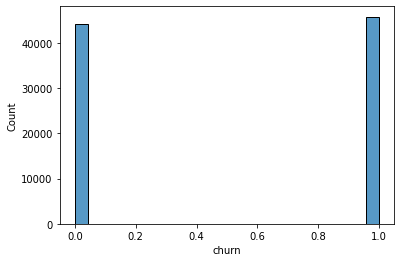

In [7]:
sns.histplot(y)

# Split TRAIN-TEST data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Divide X-y en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# TRAIN-VALIDATION

## Model Competition

Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [11]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv=4,                 # Numero de folds que vamos a utilizar para validar 
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )    
  return cross_val.mean()

In [12]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs: 
#   * modelo
#   * (X,y) 
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [13]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [14]:
evaluate_classification(label='Logistic Regression', 
                    model = LogisticRegression(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.626921,0.622928


In [15]:
evaluate_classification(label='XGB', 
                    model = XGBClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,XGB,0.845061,0.668380
0,Logistic Regression,0.626921,0.622928


In [16]:
evaluate_classification(label='Ada Boost', 
                    model = AdaBoostClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,XGB,0.845061,0.668380
2,Ada Boost,0.663176,0.656660
0,Logistic Regression,0.626921,0.622928


In [17]:
evaluate_classification(label='KNN', 
                    model = KNeighborsClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,XGB,0.845061,0.668380
2,Ada Boost,0.663176,0.656660
0,Logistic Regression,0.626921,0.622928
3,KNN,0.775655,0.552381


In [18]:
evaluate_classification(label='Gradient Boost', 
                    model = GradientBoostingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,Gradient Boost,0.688098,0.670526
1,XGB,0.845061,0.668380
2,Ada Boost,0.663176,0.656660
0,Logistic Regression,0.626921,0.622928
3,KNN,0.775655,0.552381


In [19]:
evaluate_classification(label='Bagging Classifier', 
                    model = BaggingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,Gradient Boost,0.688098,0.670526
1,XGB,0.845061,0.668380
2,Ada Boost,0.663176,0.656660
0,Logistic Regression,0.626921,0.622928
5,Bagging Classifier,0.998892,0.613637
3,KNN,0.775655,0.552381


In [20]:
evaluate_classification(label='Hist Gradient', 
                    model = HistGradientBoostingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
6,Hist Gradient,0.746132,0.677525
4,Gradient Boost,0.688098,0.670526
1,XGB,0.845061,0.668380
2,Ada Boost,0.663176,0.656660
0,Logistic Regression,0.626921,0.622928
5,Bagging Classifier,0.998892,0.613637
3,KNN,0.775655,0.552381


Después de haber probado una seguido de modelos, vemos que el Hist Gradient es el que mejor resultado ha dado, llegando a un 0.677709 de score.

## Hyperparameter tuning

En este punto, probaremos diferentes configuraciones de los parámetros del modelo ganador en el torneo de modelos con el objetivo de conseguir la mejor performance del modelo en los datos de VALIDACIÓN.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
params = {
    'loss': ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy'],
    'max_iter' : [30, 60, 100],
    'max_leaf_nodes' : [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'n_iter_no_change':[50, 100],
    'min_samples_leaf' : [5, 15, 20, 50],
    'max_bins': [100, 150, 200, 255],
    'max_depth': [3, 4, 5, 6, 7]
}

In [23]:
search_hp = RandomizedSearchCV(estimator = HistGradientBoostingClassifier(), 
                   param_distributions = params, 
                   n_iter = 20, 
                   scoring= 'roc_auc',
                   n_jobs= -1, 
                   cv= 4,
                   verbose=True)

In [24]:
search_hp.fit(X_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=HistGradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropy',
                                                 'categorical_crossentropy'],
                                        'max_bins': [100, 150, 200, 255],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_iter': [30, 60, 100],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_samples_leaf': [5, 15, 20, 50],
                                        'n_iter_no_change': [50, 100]},
                   scoring='roc_auc', verbose=True)

In [25]:
search_hp.best_params_

{'n_iter_no_change': 100,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 10,
 'max_iter': 100,
 'max_depth': 5,
 'max_bins': 255,
 'loss': 'auto',
 'learning_rate': 0.1}

In [26]:
search_hp.best_score_

0.6741282516673961

Para ayudar a la optimización del modelo hemos decidido usar los parámetros anteriores guardados en la variable *'params'*, y así poder ajustar el Hist Gradient Boosting de la mejor manera posible.

Para ello, hemos definido una serie de funciones como el ***'loss'***, el ***'auto'***, el ***'binary_crossentropy'*** y la ***'categorical_crossentropy'*** para ayudar en los problemas de clasificación del modelo, entre otras, para calcular la discrepancia entre valores predichos y valores reales.

Para controlar la complejidad del modelo y ayudar a evitar el sobreajuste hemos establecido un máximo de nodos permitidos situados en 10, 20 y 30, y un número máximo de iteraciones a realizar por parte del modelo durante el entrenamiento (30, 60 y 100 iteraciones).

También hemos establecido un *'learning rate'* relativamente bajo, para que la optimización del modelo se produzca de manera más veloz y un número mínimo de hojas en el árbol de decisión para evitar posibles sobreajustes. Finalmente, hemos optado por incluir un límite de *'bins'* para los valores nulos en 255 (valor por defecto) y valores inferiores (hasta 100) para controlar la complejidad del modelo.

Hemos creído conveniente usar estos parámetros para buscar la mejor precisión para que nuestro modelo alcance el mejor score posible.

## Select best model

Seleccionamos el mejor modelo de acuerdo con los *scores* establecidos: un AUC Train de **0.6946…** y un AUC CV de **0.6738…** evitando de esta manera un posible *'overfitting'*. Lo guardaremos en un pickle para utilizarlo posteriormente.

In [27]:
best_model = search_hp.best_estimator_
print('AUC Train:', auc(best_model, X_train, y_train))
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

AUC Train: 0.6957048259635757
AUC CV: 0.6742127759450158


In [28]:
# Guardar modelo
dump(best_model, open(FOLDER_PATH + '/model/model.pkl', 'wb'))

# TEST

* Evaluación de las métricas de performance en TEST.
  * Clasificación: AUC, ROC curve, F1-score, Accuracy, Precision, Recall.
  * Regresión: RMSE, R2-score, MAE, MAPE%, distribucion del error.



*   **AUC**



In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [31]:
# AUC Metricas
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

In [32]:
print('AUC Train: ', round(auc_train, 4))
print('AUC Test: ', round(auc_test, 4))

AUC Train:  0.6388
AUC Test:  0.6241


Una vez hemos seleccionado el mejor modelo de acuerdo con las previsiones de *score*, decidimos evaluar las métricas en TEST para el modelo elegido, empezando por calcular el AUC.

Para ello, importamos el *roc_auc_score* y lo probamos sobre el *train* y el *test*. Nuestros valores se encuentran en el **0.63**, por encima de 0.5, lo que significaría que nos encontramos ante un modelo aleatorio, y sí es cierto que se encuentra lejos del 1, que definiría un modelo perfecto. Creemos que es un buen resultado, que podría ser mejor, pero que se encuentra dentro de unos límites aceptables para la predicción, pudiendo ser el AUC de un máximo de 0.8, por ejemplo.

Ante esta situación, decidimos probar otras métricas de evaluación para asegurar que no vamos por mal camino.



*   **ROC Curve**



In [33]:
from sklearn.metrics import roc_curve

In [34]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [35]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

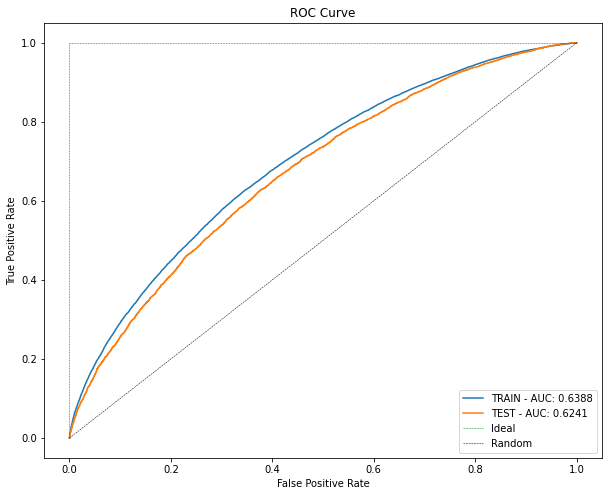

In [36]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Definimos la ROC Curve y nos fijamos que traza dos líneas con un valor y trayectoria similares, pero diferenciadas en el gráfico, lo que denota que no nos encontramos ante un modelo con *overfitting* al no estar muy separadas por un valor de más de 0.05, ni tampoco un *underfitting*, sino que como hemos comentado anteriormente, los valores se encuentran dentro de los límites aceptables.



*   **Confusion Matrix**



[]

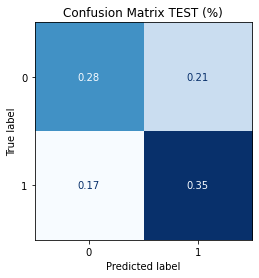

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

Si elaboramos una Confusion Matrix podemos ver que el número de TP es de **0.34** y de **0.28** en los FN. En ambos casos, estos valores son mayores que los FP o los FN, lo que nos da buenas vibraciones, aunque no sean valores muy destacados como quizás habíamos pensado desde la elección de los modelos.



*   **Accuracy, Precision, Recall y F1-Score**



In [38]:
# Accuracy, Precision, Recall y F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.6254
Precision: 0.6248
Recall: 0.675
F1-score: 0.6489


Finalmente, optamos por mirar el nivel de Accuracy, Precision, Recall y F-1 Score.

El nivel de Accuracy mide el porcentaje de predicciones correctas realizadas por el modelo respecto al total de predicciones realizadas. En nuestro caso, el modelo realizaría predicciones correctas, en un **62,62%** de las veces que realiza predicciones.

La Precision mide el porcentaje de predicciones positivas que realmente lo son. En nuestro caso, este porcentaje se eleva al **62,71%**, dando a entender que los valores clasificados como positivos realmente lo son para nuestro modelo en un **62%**.

El Recall, que muestra la relación entre los TP y todos los casos positivos, es decir, la suma de TP y FN, nos da un valor de **0.6693**, que indica que el modelo identifica correctamente el **66,93%** de todos los casos positivos.

Finalmente, el F-1 score mide el equilibrio entre el Recall y la Precision. En nuestro caso, el valor es del **64,75%**, por lo que sería un modelo aceptable.

Si nos fijamos en los cuatro aspectos podemos ver que los valores oscilan entre el **62** y el **66%**, lo que indica que el modelo rinde de manera positiva y puede identificar hasta 2/3 partes de los positivos de manera correcta, pero con cierto margen de mejora, aun intentando hacer el preprocessing de distintas maneras o eligiendo otro tipo de modelo.

# Interpretability / Explainability

* En modelos lineales: top features por peso de los coeficentes y formula del modelo.
* En modelos de arboles: Feature Importance y/o SHAP values y plot arbol de decision.

Con estas gráficas podemos ver la importancia de las diferentes *features* en nuestro modelo. Si analizamos las 5 *features* más importantes vemos que los resultados tienen bastante sentido.

La *feature* que más influye en el modelo es **'eqpdays'** (número de días (de antigüedad) del equipo actual). Es lógico pensar que la antigüedad de un cliente nos dé pistas sobre su permanencia. Un cliente que lleva mucho tiempo utilizando nuestros servicios, de manera general, los seguirá utilizando y no se dará de baja. Por la misma razón, un usuario que lleva muy poco tiempo usando nuestros servicios, tendrá una probabilidad menor de continuar usándolos el próximo mes. De esta manera, vemos como la antigüedad de un cliente es el factor más potencial y que más influye en nuestro modelo y, analizando en el ámbito de los negocios, tiene mucha importancia.

La segunda variable que más valor tiene respecto al modelo es **'mou'** (número medio de minutos mensuales de uso). Lógicamente, un usuario que usa de manera más constante los servicios, es decir, que son importantes para él, será más propenso a seguir usándolos el próximo mes. En cambio, si un usuario no utiliza estos servicios de manera tan asidua, podemos deducir que este cliente no presta tanta importancia, no le genera tanto agrado o no lo necesita, será más propenso a darse de baja.

La siguiente feature, **'months'** (número total de meses en servicio), se puede valorar del mismo modo que la variable anterior; un cliente fiel a nuestros servicios o a nuestra corporación será más propenso a continuar usando nuestros servicios mes tras mes, a no ser que sufra una mala experiencia.

**'Change_mou'** (cambio porcentual en minutos de uso frente al promedio de los tres meses anteriores) es la siguiente feature más importante con relación a nuestro modelo. Un incremento de este valor puede significar el aumento del uso de los servicios y, por lo tanto, se puede esperar su permanencia. En cambio, una tendencia a la baja, lo que implica que el valor pueda ser negativo, deduce que el cliente ha usado en menor cantidad (de tiempo) los servicios, por lo que se puede referir a un posible cambio de pensamiento con relación a la permanencia con la empresa.

Finalmente, y en la posición número cinco con menor influencia que las demás variables comentadas anteriormente, nos encontramos con la variable **'vceovr'** (ingreso medio de exceso de voz). Esta variable está relacionada con la variable anterior y es que, un uso mayor en llamadas de voz, puede suponer un incremento del uso de los servicios de la empresa. Como existen otros tipos de servicios, como por ejemplo, llamadas por videollamada o mensajes por sms, la variable no tiene tanto poder con relación al modelo, pero tiene cierto grado de 'responsabilidad' con la predicción del modelo.

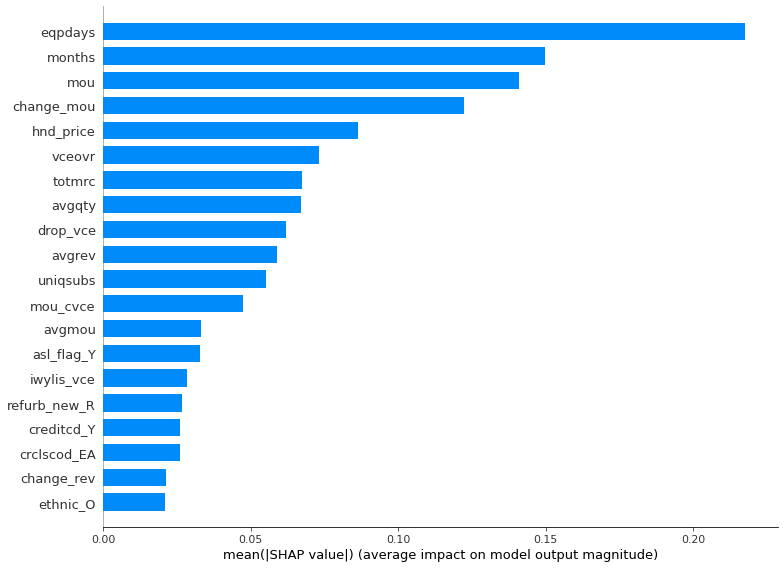

In [39]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20, plot_size=(11, 8))

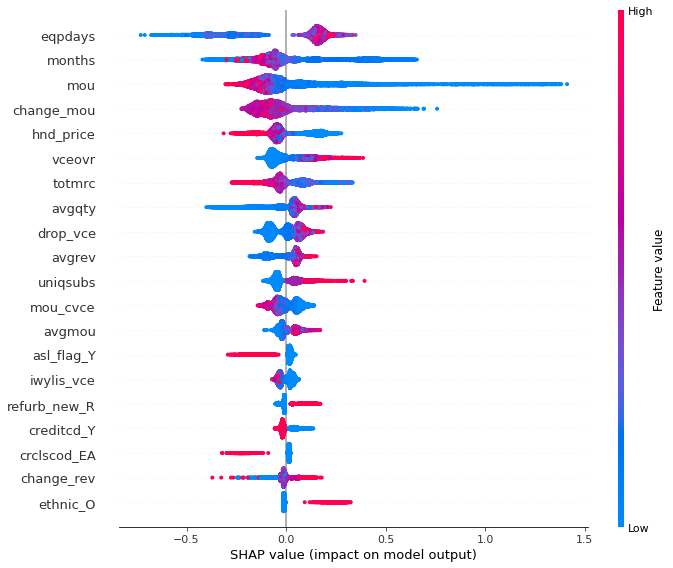

In [40]:
shap.summary_plot(shap_values, X_test, plot_size=(10, 8))